In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/PFE/PFE

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/PFE/PFE


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import numpy as np
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default data type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float32
torch.set_default_tensor_type(FloatTensor)

In [0]:
ds_name = "PTC_MR"
batch_size = 128
n_folds = 3
folded_train_data, folded_test_data, folded_valid_data, info = get_folded_data(ds_name, batch_size, n_folds)

In [0]:
learning_rate = 0.0001
num_epochs = 500
n_features = info[0]
hidden_dim = 20
n_classes = info[1]
dropout = 0.1
n_gnn_layers = 5
n_mlp_layers = 2

AttributeError: ignored

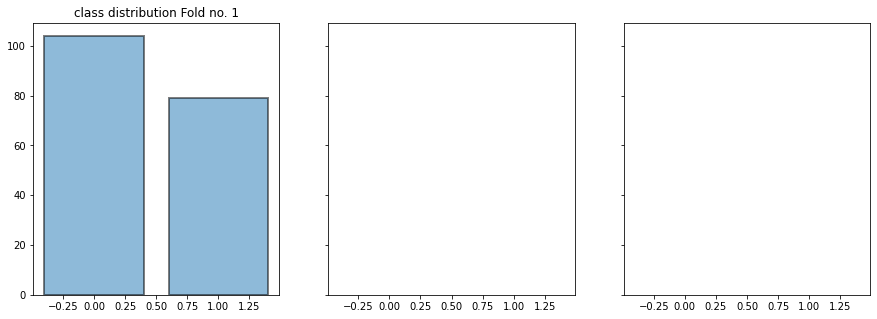

In [63]:
counts = np.zeros((n_folds, n_classes))
h_labels = []
for fold in range(n_folds):
    for _, _, labels in folded_train_data[fold]:
        h_labels.append(labels.cpu().tolist())
        unique, count = np.unique(labels.cpu(), return_counts=True)
        counts[fold] += count

fig, ax = plt.subplots(1, n_folds, figsize=(15,5), sharex=True, sharey=True)
for i in range(n_folds):
    ax[i].bar(unique, counts[i], align='center', alpha=0.5, edgecolor='black', linewidth=2)
    ax[i].set_title("class distribution Fold no. {}".format(i+1))
    ax[i].xticks(unique, unique)

Fold no. 1, epoch [1/500], Loss: 6.6208, train_acc: 54.0, valid_acc: 55.0
Fold no. 1, epoch [2/500], Loss: 6.1590, train_acc: 55.0, valid_acc: 55.0
Fold no. 1, epoch [3/500], Loss: 4.6161, train_acc: 56.0, valid_acc: 55.0
Fold no. 1, epoch [4/500], Loss: 6.1306, train_acc: 52.0, valid_acc: 55.0
Fold no. 1, epoch [5/500], Loss: 7.0000, train_acc: 56.0, valid_acc: 55.0
Fold no. 1, epoch [6/500], Loss: 5.2635, train_acc: 53.0, valid_acc: 55.0
Fold no. 1, epoch [7/500], Loss: 6.0004, train_acc: 55.0, valid_acc: 55.0
Fold no. 1, epoch [8/500], Loss: 6.9756, train_acc: 56.0, valid_acc: 55.0
Fold no. 1, epoch [9/500], Loss: 6.3535, train_acc: 54.0, valid_acc: 55.0
Fold no. 1, epoch [10/500], Loss: 5.3653, train_acc: 54.0, valid_acc: 55.0
Fold no. 1, epoch [11/500], Loss: 4.3557, train_acc: 54.0, valid_acc: 55.0
Fold no. 1, epoch [12/500], Loss: 4.7314, train_acc: 51.0, valid_acc: 55.0
Fold no. 1, epoch [13/500], Loss: 3.7549, train_acc: 53.0, valid_acc: 55.0
Fold no. 1, epoch [14/500], Loss: 

No handles with labels found to put in legend.


Fold no. 1, epoch [497/500], Loss: 0.0905, train_acc: 95.0, valid_acc: 54.0
Fold no. 1, epoch [498/500], Loss: 0.1307, train_acc: 95.0, valid_acc: 54.0
Fold no. 1, epoch [499/500], Loss: 0.1265, train_acc: 91.0, valid_acc: 52.0
Fold no. 1, epoch [500/500], Loss: 0.0992, train_acc: 95.0, valid_acc: 55.0


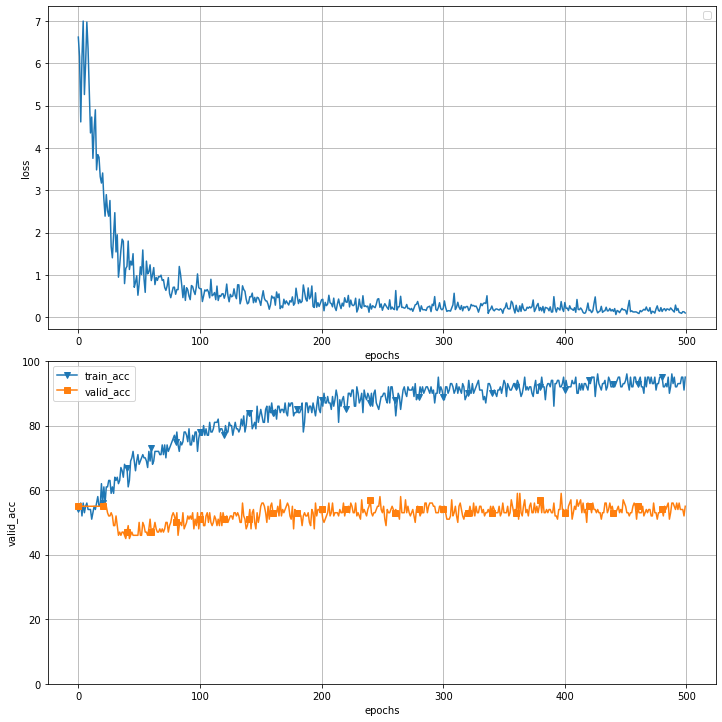

Fold no. 2, epoch [1/500], Loss: 11.0087, train_acc: 52.0, valid_acc: 60.0
Fold no. 2, epoch [2/500], Loss: 10.3092, train_acc: 51.0, valid_acc: 60.0
Fold no. 2, epoch [3/500], Loss: 10.2163, train_acc: 51.0, valid_acc: 60.0
Fold no. 2, epoch [4/500], Loss: 7.7080, train_acc: 53.0, valid_acc: 60.0
Fold no. 2, epoch [5/500], Loss: 6.4901, train_acc: 53.0, valid_acc: 60.0
Fold no. 2, epoch [6/500], Loss: 7.1983, train_acc: 55.0, valid_acc: 61.0
Fold no. 2, epoch [7/500], Loss: 6.8091, train_acc: 54.0, valid_acc: 60.0
Fold no. 2, epoch [8/500], Loss: 5.1163, train_acc: 54.0, valid_acc: 61.0
Fold no. 2, epoch [9/500], Loss: 5.6010, train_acc: 55.0, valid_acc: 61.0
Fold no. 2, epoch [10/500], Loss: 6.8532, train_acc: 54.0, valid_acc: 59.0
Fold no. 2, epoch [11/500], Loss: 4.6407, train_acc: 54.0, valid_acc: 60.0
Fold no. 2, epoch [12/500], Loss: 3.9678, train_acc: 54.0, valid_acc: 60.0
Fold no. 2, epoch [13/500], Loss: 5.2950, train_acc: 57.0, valid_acc: 60.0
Fold no. 2, epoch [14/500], Los

No handles with labels found to put in legend.


Fold no. 2, epoch [498/500], Loss: 0.2860, train_acc: 92.0, valid_acc: 46.0
Fold no. 2, epoch [499/500], Loss: 0.2601, train_acc: 90.0, valid_acc: 47.0
Fold no. 2, epoch [500/500], Loss: 0.0950, train_acc: 94.0, valid_acc: 50.0


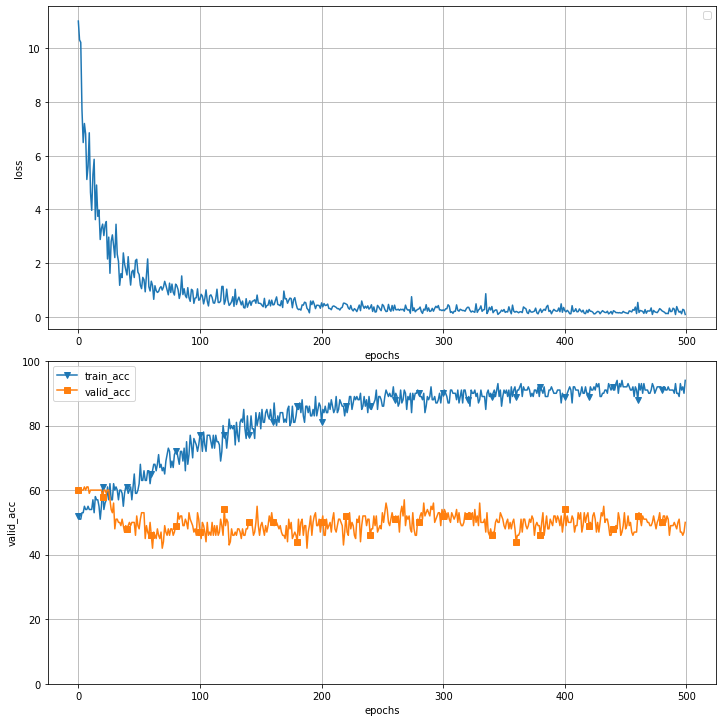

Fold no. 3, epoch [1/500], Loss: 8.2590, train_acc: 52.0, valid_acc: 51.0
Fold no. 3, epoch [2/500], Loss: 6.3015, train_acc: 52.0, valid_acc: 51.0
Fold no. 3, epoch [3/500], Loss: 7.6983, train_acc: 52.0, valid_acc: 51.0
Fold no. 3, epoch [4/500], Loss: 10.3888, train_acc: 53.0, valid_acc: 51.0
Fold no. 3, epoch [5/500], Loss: 5.6875, train_acc: 53.0, valid_acc: 51.0
Fold no. 3, epoch [6/500], Loss: 8.6663, train_acc: 54.0, valid_acc: 52.0
Fold no. 3, epoch [7/500], Loss: 5.7786, train_acc: 54.0, valid_acc: 52.0
Fold no. 3, epoch [8/500], Loss: 4.3490, train_acc: 53.0, valid_acc: 52.0
Fold no. 3, epoch [9/500], Loss: 5.3565, train_acc: 53.0, valid_acc: 52.0
Fold no. 3, epoch [10/500], Loss: 4.1398, train_acc: 52.0, valid_acc: 51.0
Fold no. 3, epoch [11/500], Loss: 4.3247, train_acc: 54.0, valid_acc: 51.0
Fold no. 3, epoch [12/500], Loss: 5.1186, train_acc: 53.0, valid_acc: 51.0
Fold no. 3, epoch [13/500], Loss: 3.9677, train_acc: 53.0, valid_acc: 51.0
Fold no. 3, epoch [14/500], Loss:

No handles with labels found to put in legend.


Fold no. 3, epoch [496/500], Loss: 0.1502, train_acc: 96.0, valid_acc: 47.0
Fold no. 3, epoch [497/500], Loss: 0.1754, train_acc: 95.0, valid_acc: 42.0
Fold no. 3, epoch [498/500], Loss: 0.1063, train_acc: 94.0, valid_acc: 45.0
Fold no. 3, epoch [499/500], Loss: 0.1786, train_acc: 94.0, valid_acc: 46.0
Fold no. 3, epoch [500/500], Loss: 0.1409, train_acc: 94.0, valid_acc: 45.0


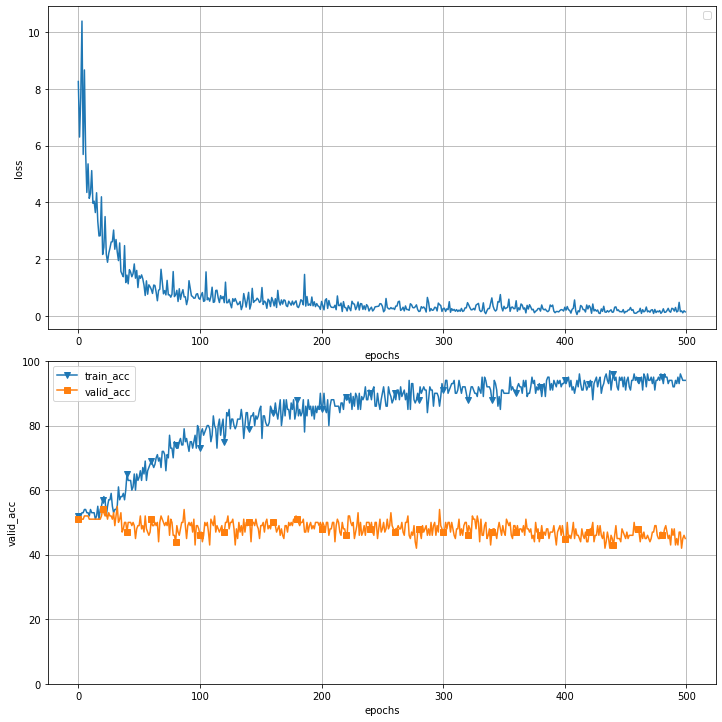

Average training accuracy across the 3 folds: 94.3
Average validation accuracy across the 3 folds: 50.0


In [38]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_GNN(model, folded_train_data, folded_test_data, optimizer, criterion, num_epochs=num_epochs, device=device)

In [0]:
!git add --all